# Extract entities from social media posts, using the `extract_` functions from advertools (a Python package for online marketing)

When analyzing a set of social media posts it's helpful to categorize / summarize them in structured way. We will go through three functions to extract important entities from a set of tweets. 
The main idea, is that although the post is technically a string of characters, some of those strings are not simply words, they have more importance (hashtags), need decoding (emoji), and show links to other users and posts (mentions). 

Once you have extracted those entities and summarized them in a structured manner, you are in a better position to understand those posts. 
- **Hashtags:** Although these are strictly words, they are words that have been emphasized by the user who posted them. They also help group posts into threads / conversations so we can separate our dataset into sub-conversations where applicable.   
- **Emoji:** More expressive and pictorial ways of saying something. Although you get to extract emoji from your dataset, you also get their decoded names as well, so they become almost like text and you can do text mining on those emoji. 
For example, here is what you might get for each emoji after extracting them:  
 🎥: movie camera  
🔥: fire  
🍪: cookie  
😂: face with tears of joy  
🤔: thinking face  
etc.   
- **Mentions:** These are important in showing how "conversational" your set of posts are. It also gives a lot of context as to who are the most influential accounts in the set of posts, and how they relate to each other. If you are into network science / graph theory, mentions and hashtags will give you a great way to understand how the posts are related to each other. 

We will see how this can be done using a set of 5,000 tweets. 

**Some background on those tweets: **

- #JustDoIt: All tweets contain this hashtag.
- The tweets happened on September 7, 2018, which is days after Nike announced its endorsement of Colin Kaepernick, and making him the face of their 30th anniversary of their JustDoIt campaign.
- Kaepernick made a controversial decision not to stand up during the national anthem, as a protest to police brutality, a while back.
- This has stirred a heated debate, and became a big national issue especially when [Donald Trump commented on it](https://www.youtube.com/watch?v=oY3hpZVZ7pk)

This notebook is mainly for demonstrating how to use the `extract_` functions and structure the tweets in an easier way, and will not analyze the content much. By the way, the Twitter API provides you with those entities extracted with some meta data, so you don't need these functions in that case, but you may need in the following cases: 
- Many tweet datasets come as raw text and you will have to extract entities yourself
- When you export tweets from your own account, the entities don't come extracted
- This approach works for any kind of social media posts, where hashtags, mentions, and emoji have become near-universal in their use

## [advertools](https://github.com/eliasdabbas/advertools)

A Python package for online marketing productivity and analysis. You can learn more about it in the [GitHub repo](https://github.com/eliasdabbas/advertools), and it can easily be installed by running: 

`pip install advertools`

## Outline

* [Hashtags](#hashtags)
* [Emoji](#emoji)
* [Mentions](#mentions)
* [Combine tweets & extracted entities](#combine)
* [Absolute vs weighted word frequency](#abs_weighted)


We start by preparing the environment by importing the relevant libraries, and setting some options: 

In [1]:
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)

In [2]:
tweets_users_df = pd.read_csv('justdoit_tweets_2018_09_07_2.csv')
print(tweets_users_df.shape)
tweets_users_df.head(3)

(5089, 72)


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76...","{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': '...",0,False,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow"">Statusbrew</a>",False,"{'id': 3188618684, 'id_str': '3188618684', 'name': 'Ultra YOU Woman', 'screen_name': 'UltraYOUwoman', 'location': 'California, USA', 'description': 'I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories,...",False,Fri May 08 10:27:51 +0000 2015,True,False,"I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories, skincare & post-birth snap back!","{'url': {'urls': [{'url': 'https://t.co/jGlJswxjwS', 'expanded_url': 'https://about.me/ultrayouwoman', 'display_url': 'about.me/ultrayouwoman', 'indices': [0, 23]}]}, 'description': {'urls': []}}",307.0,False,57983.0,False,48721.0,False,False,3.188619e+09,3.188619e+09,False,False,en,629.0,"California, USA",Ultra YOU Woman,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/3188618684/1431170427,http://pbs.twimg.com/profile_images/597000926272954368/eQ-8VrVk_normal.jpg,https://pbs.twimg.com/profile_images/597000926272954368/eQ-8VrVk_normal.jpg,1DA1F2,C0DEED,DDEEF6,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90, 95]}, {'text': 'fdny', 'indices': [96, 101]}, {'text': 'likesforlikes', 'indices': [102, 116]}, {'text': 'promo', 'indices': [117, 123]}, {'text': 'music', 'indices': [124, 130]}, {'text': 'instagood', 'indices': [131, 141]}

We won't be using most of the columns here, but they are kept in the dataset in case you may have other ideas on analyzing other things in a different way. 

Note that all columns are prefixed with `tweet_` and `user_` to indicate columns that have data about the tweet itself, and data about the user who made that tweet. 
Removing those prefixes would give you the original column names as provided by the Twitter API. 

<a id='hashtags'></a>
## Hashtags

Let's start by extracting the hashtags. You will see that all the functions for extracting entities, have a similar interface. 
Once you   
`import advertools as adv`  
then you can run `adv.extract_<tab>` and get the available options.
The output of these functions is a dictionary, the keys of which provide a different summary of the entities extracted. 
Here we will mainly deal with the tweet text itself from the column `tweets_users_df['tweet_full_text']`. You can do a similar analysis for users' profiles for example, because it is mainly text, and contains some of those entities.
We first define `hashtag_summary` and then explore the available keys of the resulting dictionary:

In [3]:
hashtag_summary = adv.extract_hashtags(tweets_users_df['tweet_full_text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

The most general one to get a quick idea about the data is the `overview` key.  
This shows us how many posts we have, the total number of hashtags (or mentions, or emoji), the average number of hashtags per post, and the number of unique hashtags. 


In [4]:
hashtag_summary['overview']

{'num_posts': 5089,
 'num_hashtags': 15489,
 'hashtags_per_post': 3.043623501670269,
 'unique_hashtags': 4633}

Next, we can explore the extracted hashtags themselves. Here we are looking at the first ten.   
As you can see for each post we get a list of hashtags. We get an empty list wherever there are no hashtags in the tweet. 

In [5]:
hashtag_summary['hashtags'][:10]

[['#quote', '#motivation', '#justdoit'],
 ['#hero',
  '#fdny',
  '#likesforlikes',
  '#promo',
  '#music',
  '#instagood',
  '#instadaily',
  '#postoftheday',
  '#bestoftheday',
  '#justdoit',
  '#nike',
  '#picoftheday'],
 ['#justdoit', '#4yourmorning', '#4yourmemecollection'],
 ['#kapernickeffect', '#swoosh', '#justdoit'],
 ['#shaquem',
  '#nfl',
  '#seattle',
  '#seahawks',
  '#griffin',
  '#justdoit',
  '#nike'],
 ['#justdoit'],
 ['#registertovote', '#justdoit'],
 ['#justdoit'],
 ['#justdoit', '#takeaknee', '#takeakneeinnikes'],
 ['#fx',
  '#feelgoodfriday',
  '#fridayfeeling',
  '#tradermoni',
  '#justdoit',
  '#fridaymotivation']]

Next, we take a look at the flattened list of hashtags. `hashtags_flat` is the name of this list and it basically is a single-dimensional list of all the available hashtags.   
This is convenient if you want to do aggregate analysis on the whole set of hashtags. 

In [6]:
hashtag_summary['hashtags_flat'][:10]

['#quote',
 '#motivation',
 '#justdoit',
 '#hero',
 '#fdny',
 '#likesforlikes',
 '#promo',
 '#music',
 '#instagood',
 '#instadaily']

The count of hashtags for each tweet is given by the `hashtag_counts` key.   
Later, we will combine all these in one DataFrame and do further analysis on them.

In [7]:
hashtag_summary['hashtag_counts'][:20]

[3, 12, 3, 3, 7, 1, 2, 1, 3, 6, 1, 2, 1, 1, 2, 1, 7, 1, 3, 2]

It is also interesting to know the frequency of using hashtags in this data set.   
The `hashtag_freq` key shows us the number of tweets containing 1, 2, 3, etc hashtags.  
Here you will see that we have 2,058 tweets with one hashtag, 1,059 tweets with two hashtags, and so on.  
Notice that there are no tweets with zero hashtags. This is unusual, but not surprising in this dataset, because by definition, we requested the tweets that contained a special hashtag, so they all include at least that hashtag. 

In [8]:
hashtag_summary['hashtag_freq'][:15]

[(1, 2058),
 (2, 1059),
 (3, 687),
 (4, 375),
 (5, 237),
 (6, 156),
 (7, 94),
 (8, 74),
 (9, 60),
 (10, 65),
 (11, 58),
 (12, 38),
 (13, 26),
 (14, 24),
 (15, 11)]

Visualizing the frequencies to get a better overview of how they are distributed, we plot the top fifteen frequencies: 

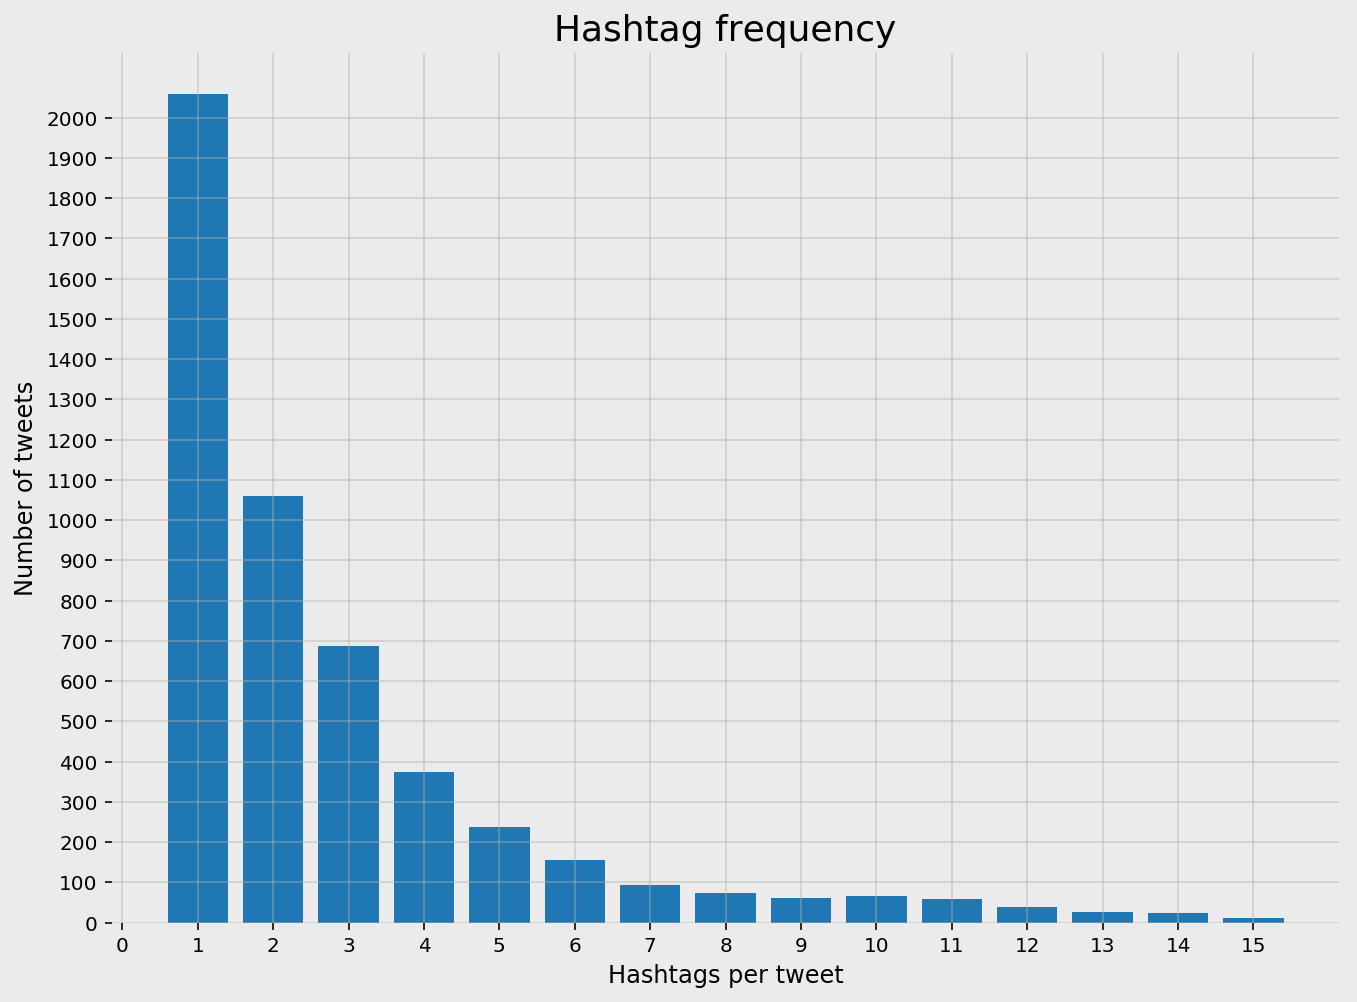

In [9]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

You are probably wonderig which are the top hashtags, and how popular they are.   
This is provided by the `top_hashtags` key.   
As mentioned above, it shouldn't be a surprise that #justdoit is the top one, and that #nike and #colinkaepernick are in the top positions as well.

In [10]:
hashtag_summary['top_hashtags'][:10]

[('#justdoit', 5150),
 ('#nike', 1112),
 ('#colinkaepernick', 208),
 ('#takeaknee', 138),
 ('#kaepernick', 137),
 ('#nfl', 106),
 ('#nflkickoff', 75),
 ('#imwithkap', 73),
 ('#nikead', 70),
 ('#nikeboycott', 69)]

Visualizing the same data (excluding #justdoit and #nike): 

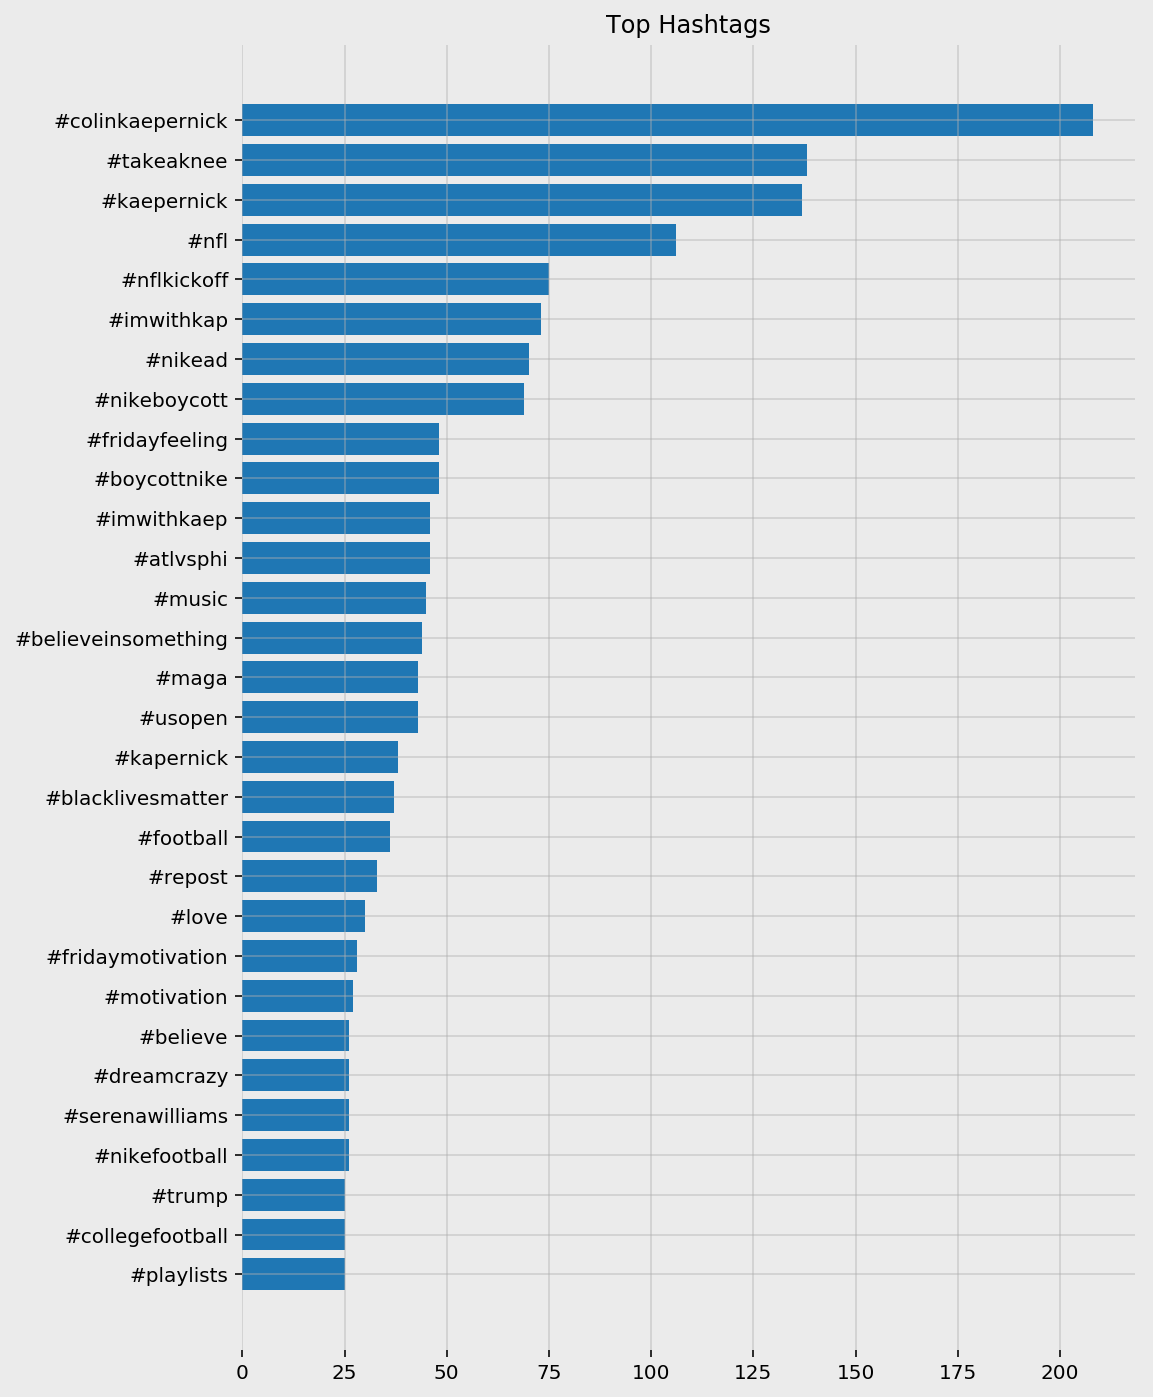

In [11]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

<a id='emoji'></a>
## Emoji

You will see that the `extract_emoji` function is pretty much the same as `extract_hashtags`. The only difference is that it has emoji both as images and their textual counterparts. 

In [12]:
emoji_summary = adv.extract_emoji(tweets_users_df['tweet_full_text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'overview'])

In [13]:
emoji_summary['overview']

{'num_posts': 5089,
 'num_emoji': 3205,
 'emoji_per_post': 0.6297897425820397,
 'unique_emoji': 407}

In [14]:
emoji_summary['emoji'][:20]

[[],
 ['👨\u200d🚒', '👨\u200d🚒', '💯', '🎥', '🔥', '✊🏿'],
 ['🍪', '😂'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['🤔', '🙄', '😳'],
 [],
 [],
 []]

In [15]:
emoji_summary['emoji_text'][:20]

[[],
 ['man firefighter',
  'man firefighter',
  'hundred points',
  'movie camera',
  'fire',
  'raised fist dark skin tone'],
 ['cookie', 'face with tears of joy'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['thinking face', 'face with rolling eyes', 'flushed face'],
 [],
 [],
 []]

In [16]:
emoji_summary['emoji_flat'][:10]

['👨\u200d🚒', '👨\u200d🚒', '💯', '🎥', '🔥', '✊🏿', '🍪', '😂', '🤔', '🙄']

In [17]:
emoji_summary['emoji_flat_text'][:10]

['man firefighter',
 'man firefighter',
 'hundred points',
 'movie camera',
 'fire',
 'raised fist dark skin tone',
 'cookie',
 'face with tears of joy',
 'thinking face',
 'face with rolling eyes']

Putting them side by side to get a better idea, and taking a look at the first ten: 

In [18]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('👨\u200d🚒', 'man firefighter'),
 ('👨\u200d🚒', 'man firefighter'),
 ('💯', 'hundred points'),
 ('🎥', 'movie camera'),
 ('🔥', 'fire'),
 ('✊🏿', 'raised fist dark skin tone'),
 ('🍪', 'cookie'),
 ('😂', 'face with tears of joy'),
 ('🤔', 'thinking face'),
 ('🙄', 'face with rolling eyes')]

In [19]:
emoji_summary['emoji_counts'][:15]

[0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
emoji_summary['emoji_freq'][:15]

[(0, 3952),
 (1, 502),
 (2, 223),
 (3, 153),
 (4, 82),
 (5, 54),
 (6, 52),
 (7, 18),
 (8, 8),
 (9, 5),
 (10, 4),
 (11, 7),
 (12, 7),
 (13, 4),
 (14, 3)]

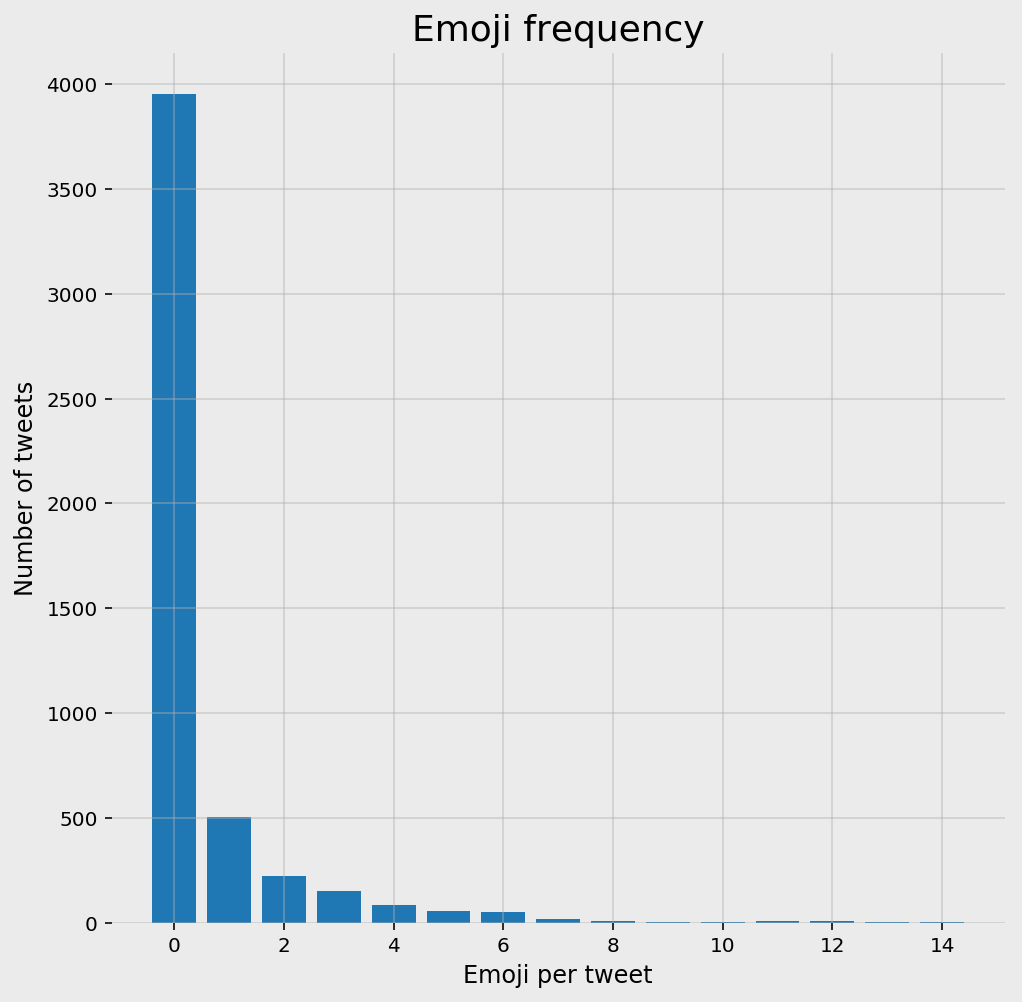

In [21]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [22]:
emoji_summary['top_emoji'][:20]

[('😂', 535),
 ('🤣', 177),
 ('✔', 163),
 ('🔥', 122),
 ('❤', 83),
 ('🏈', 80),
 ('💯', 50),
 ('💙', 49),
 ('🇺🇸', 48),
 ('😭', 46),
 ('✊🏾', 42),
 ('👟', 39),
 ('✊🏽', 37),
 ('👀', 37),
 ('🤔', 31),
 ('💩', 30),
 ('👏', 29),
 ('😎', 28),
 ('🙌🏽', 28),
 ('⭐', 28)]

In [23]:
emoji_summary['top_emoji_text'][:20]

[('face with tears of joy', 535),
 ('rolling on the floor laughing', 177),
 ('heavy check mark', 163),
 ('fire', 122),
 ('red heart', 83),
 ('american football', 80),
 ('hundred points', 50),
 ('blue heart', 49),
 ('United States', 48),
 ('loudly crying face', 46),
 ('raised fist medium-dark skin tone', 42),
 ('running shoe', 39),
 ('raised fist medium skin tone', 37),
 ('eyes', 37),
 ('thinking face', 31),
 ('pile of poo', 30),
 ('clapping hands', 29),
 ('smiling face with sunglasses', 28),
 ('raising hands medium skin tone', 28),
 ('white medium star', 28)]

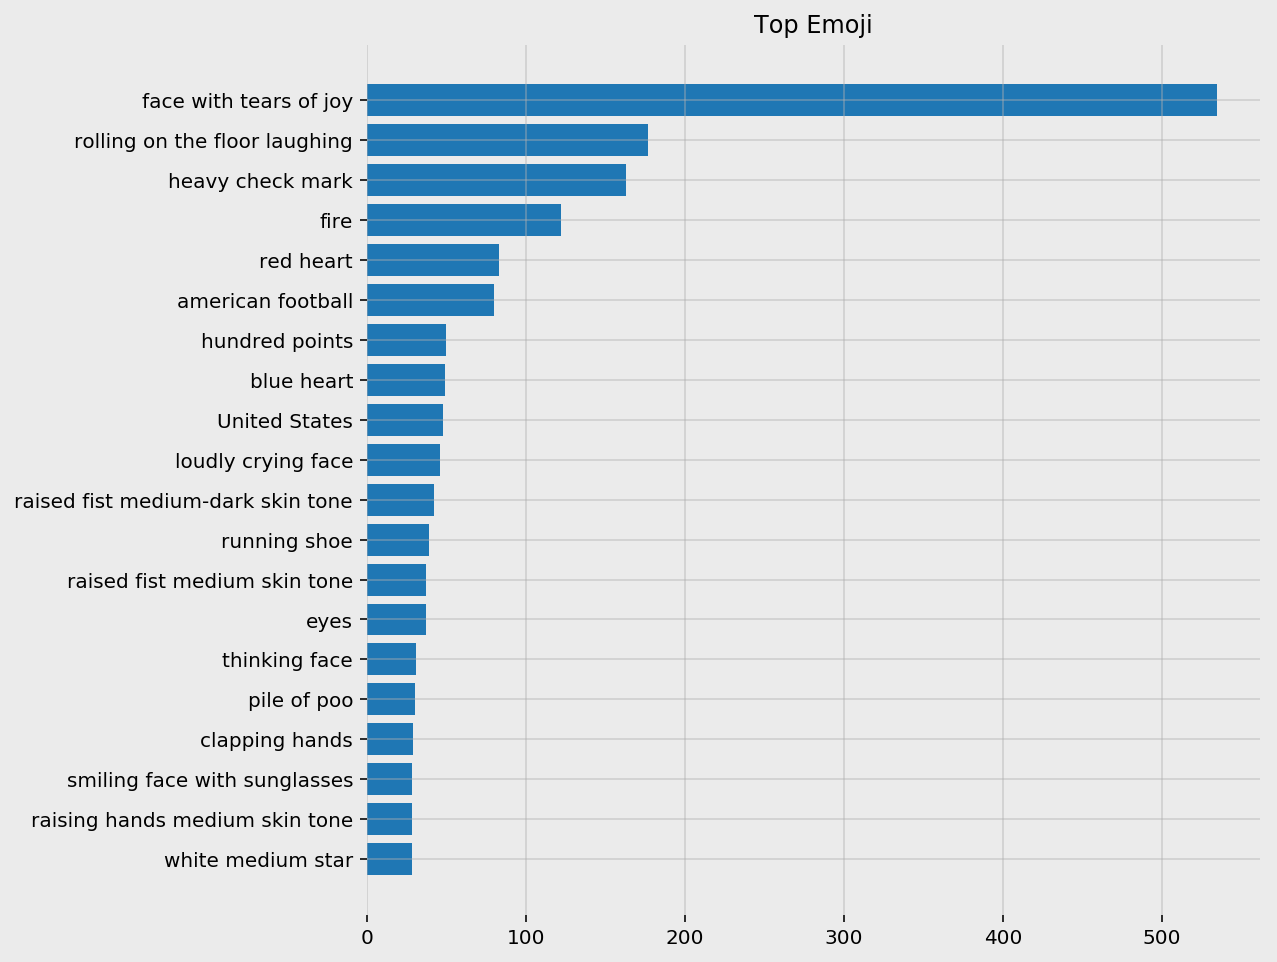

In [24]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

The "heavy check mark" is probably people referring to Nike, which is similar to the Nike swoosh logo. You can easily filter those tweets and check to verify.   
Fire probably refers to people who are against Nike's decision to support Kaepernick, as there is a trend of people who are burning their Nike clothes / shoes in protest of Nike's decision.   
You can explore many of these things as you have them extracted and structured as if they were words. 

<a id='mentions'></a>
## Mentions

Again, by now it should be familiar, and you will be able to guess the names of the keys and what they would produce. 

In [25]:
mention_summary = adv.extract_mentions(tweets_users_df['tweet_full_text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [26]:
mention_summary['overview']

{'num_posts': 5089,
 'num_mentions': 4863,
 'mentions_per_post': 0.9555904892906268,
 'unique_mentions': 1624}

0.95 mentions per tweet hints that this might be a conversational set of tweets. Probably many people were mentioning others, replying to them, etc.   
Also, there are 1,631 unique mentions out of the total of 4,870 mentions, which seems that it's quite a diverse set of mentions.   
Let's explore more and verify.

In [27]:
mention_summary['mentions'][:15]

[[],
 [],
 [],
 [],
 [],
 ['@realdonaldtrump'],
 [],
 ['@nike'],
 ['@nike', '@nikestore', '@kaepernick7'],
 [],
 [],
 ['@nike'],
 ['@cspensions'],
 ['@realdonaldtrump', '@colinkaperneck7'],
 ['@repadamschiff', '@repadamschiff']]

In [28]:
mention_summary['mentions_flat'][:10]

['@realdonaldtrump',
 '@nike',
 '@nike',
 '@nikestore',
 '@kaepernick7',
 '@nike',
 '@cspensions',
 '@realdonaldtrump',
 '@colinkaperneck7',
 '@repadamschiff']

In [29]:
mention_summary['mention_counts'][:20]

[0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0]

In [30]:
mention_summary['mention_freq'][:15]

[(0, 2738),
 (1, 1386),
 (2, 602),
 (3, 193),
 (4, 66),
 (5, 34),
 (6, 18),
 (7, 8),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 4),
 (12, 2),
 (13, 1),
 (14, 2)]

Here we get a better idea since we see how mentions are distributed.  
Although we previously saw that there is almost one mention per tweet (on average), now we see that more than half the tweets didn't have any mentions in them.  
This is the additional view that is given by the `mention_freq` key.   
Visualizing the above data: 

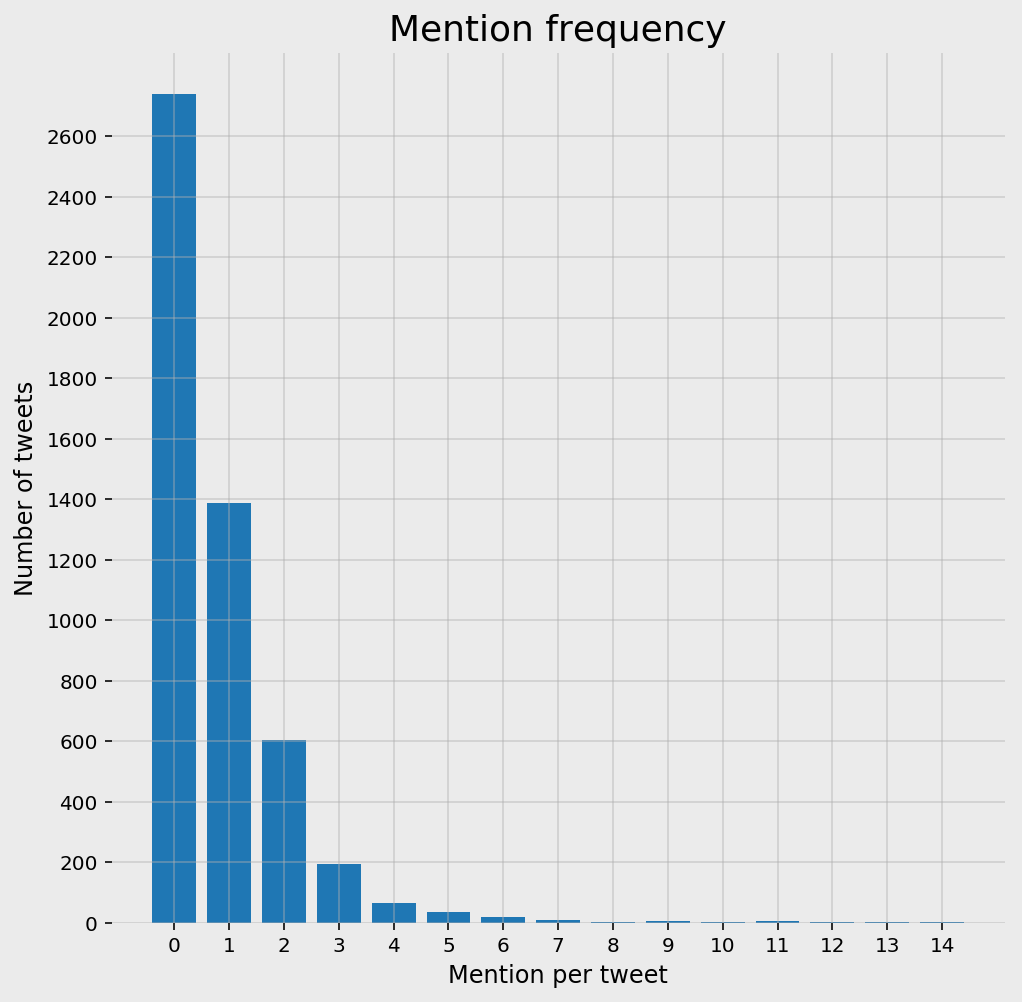

In [31]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [32]:
mention_summary['top_mentions'][:10]

[('@nike', 964),
 ('@kaepernick7', 493),
 ('@realdonaldtrump', 412),
 ('@serenawilliams', 84),
 ('@nfl', 65),
 ('@youtube', 38),
 ('@corybooker', 36),
 ('@potus', 29),
 ('@kingjames', 27),
 ('@nflcommish', 21)]

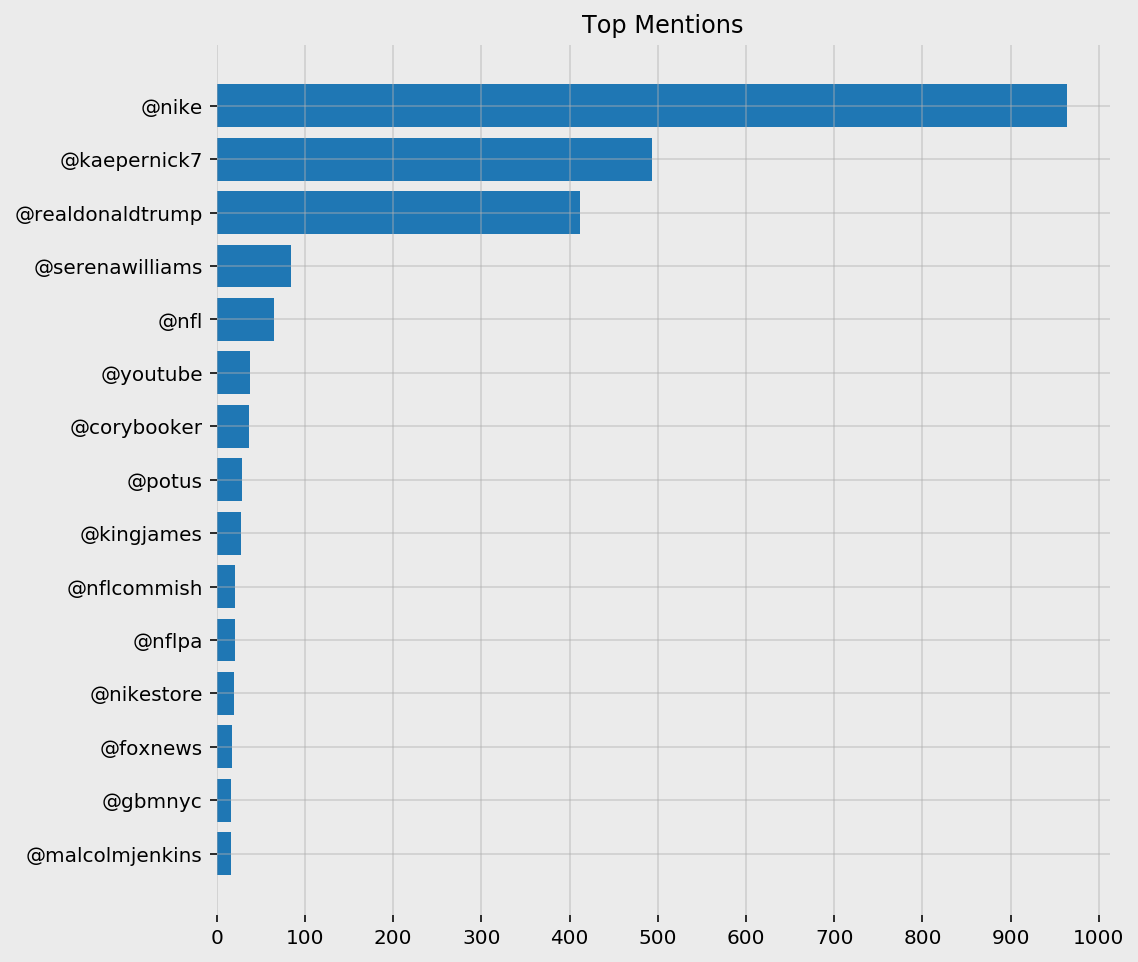

In [33]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

<a id='combine'></a>
## Combine tweets, usernames, followers counts, with extracted entities

Now that we have extracted the entities that we want, we can now create a new DataFrame showing tweets, usernames, followers count, and the extracted entities:

In [34]:
extracted_tweets =  (tweets_users_df[['tweet_full_text', 'user_screen_name', 'user_followers_count']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_tweets.head()

,tweet_full_text,user_screen_name,user_followers_count,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,UltraYOUwoman,57983.0,"[#quote, #motivation, #justdoit]",3,[],0,[],[],0
1,Shout out to the Great Fire Department and the tour! 👨‍🚒👨‍🚒 Much love to NYC! 💯🎥🔥✊🏿\n•\n•\n•\n#hero #fdny #likesforlikes #promo #music #instagood #instadaily #postoftheday #bestoftheday #justdoit #nike #picoftheday... https://t.co/sFobQ2ukpo,yungcutup,13241.0,"[#hero, #fdny, #likesforlikes, #promo, #music, #instagood, #instadaily, #postoftheday, #bestoftheday, #justdoit, #nike, #picoftheday]",12,[],0,"[👨‍🚒, 👨‍🚒, 💯, 🎥, 🔥, ✊🏿]","[man firefighter, man firefighter, hundred points, movie camera, fire, raised fist dark skin tone]",6
2,"There are some AMAZINGLY hilarious Nike Ad memes happening on my newsfeed. Soooo, I decided to get a little creative too... \n\n#JustDoIt #4YourMorning #4YourMemeCollection \n\n🍪😂 https://t.co/6ok9qR6k6M",rachelbogle,11377.0,"[#justdoit, #4yourmorning, #4yourmemecollection]",3,[],0,"[🍪, 😂]","[cookie, face with tears of joy]",2
3,#kapernickeffect #swoosh #justdoit @ Lucas Bishop's Cigar Lounge https://t.co/BhPBnjOkuU,ErvGotti609,218.0,"[#kapernickeffect, #swoosh, #justdoit]",3,[],0,[],[],0
4,"One Hand, One Dream: The Shaquem Griffin Story https://t.co/0EbEmwULLF #shaquem #NFL #Seattle #Seahawks #griffin #JustDoIt #Nike https://t.co/pr8eosDZS7",NoLuckNeeded,13731.0,"[#shaquem, #nfl, #seattle, #seahawks, #griffin, #justdoit, #nike]",7,[],0,[],[],0


<a id='abs_weighted'></a>
## Absolute vs Weighted Counts

So far we have counted the entities that we wanted and got the absolute count of each, in different formats and summaries.  
What about how influential each of those entities was, and how much reach / engagement they generated?  

Let's say ten people, each with 100 followers tweeted using the hashtag **#basketball** in their tweets.  
Therefore those tweets are expected to potentially reach 10 x 100 = 1,000 people (not really that much because of follower overlap, and not everyone sees all tweets, but we will use this simplified assumption for now).  
Let's also assume that only one person used the hashtag **#NFL** in these tweets. And let's also assume that this person has 20,000 followers. Then which hashtag reached more users?  
Obviously **#NFL** would reach more because, although only one person tweeted it, that one person had more followers than the ten others who tweeted **#basketball** combined.  

So, now we will take the same analysis to a new level, and by assigning a weight for each tweet. As mentioned above, we will use the number of followers as a weight for each tweet, which is a good proxy to how much reach it would generate.  
You can / should look at other weights as well. Maybe at the number of retweets, or favorites, which also show how much engagement was generated and subsequent reach.  
Why not multiply the number of followers by the number of retweets the tweet generated, to give an even better estimate on the reach of the tweet? It's up to you to decide what makes sense for your case.  
For now we will look at the number of followers as our main proxy. 

`advertools` has a special function for measuring the two types of word frequency (absolute and weighted), and we will take a look at that briefly here.  
A full discussion of how this function was created and how it works can be found in my [tutorial on DataCamp discussing absolute vs weighted word frequency.](https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency)

Basically `word_frequency` takes two lists, a text list (the tweets' text and entities in our case), and a list of numbers describing our dataset (the number of followers in this case).   
The output shows both the absolute count, and the weighted count of each of our words (hashtags, emoji, mentions, in this case). 

Let's see what the top hashtags were in terms of weighted frequency: 



In [35]:
word_freq_hash = adv.word_frequency(extracted_tweets['hashtags'].str.join(' '), 
                                    extracted_tweets['user_followers_count'].fillna(0))
word_freq_hash.head(10)


,word,abs_freq,wtd_freq,rel_value
0,#justdoit,5150,17020680.0,3305.0
1,#drjanegoodall,1,2896006.0,2896006.0
2,#nike,1112,2076009.0,1867.0
3,#itstrue,1,1057047.0,1057047.0
4,#takeaknee,138,1004787.0,7281.0
5,#imwithkaep,46,814506.0,17707.0
6,#colinkaepernick,208,481859.0,2317.0
7,#nfl,106,400158.0,3775.0
8,#believeinsomething,44,379901.0,8634.0
9,#nflkickoff,75,373529.0,4980.0


The first one is of course going to be #justdoit because this is what all tweets contain, but the second and fourth are surprising, because we don't see them anywhere in the lists above, and they both have an absolute frequency of 1 (they were used only once).  
This means that this one time where they were used they were tweeted by someone with a very large number of followers, and therefore, the tweet(s) containing these hashtags have achieved more reach than others, that have been tweeted more frequently.   
Let's see who these tweets were tweeted by: 

In [36]:
extracted_tweets[extracted_tweets['hashtags'].str.join(' ').str.contains('drjanegoodall|itstrue',case=False)]

,tweet_full_text,user_screen_name,user_followers_count,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
1465,"When I see a video like this I have to keep repeating ""they belong in the wild, they belong in the wild..."", resist the urge to get one as a pet &amp; instead make a donation to the great work of #DrJaneGoodall. 🐒 #JustDoIt at https://t.co/NKndhJu9np https://t.co/3vDHe4hqYh",HamillHimself,2896006.0,"[#drjanegoodall, #justdoit]",2,[],0,[🐒],[monkey],1
4527,Believe in the 3 Is’. Intensity. Integrity. Intelligence. #itstrue #justdoit https://t.co/rDZ29gYKTd,RealKurtAngle,1057047.0,"[#itstrue, #justdoit]",2,[],0,[],[],0


Apparently, there are two tweets by two different accounts who have 2,896,006 and 1,057,047 followers, respectively.  
This is a very good example where you are able to extract hidden information in a data set. Had we not looked at the weighted frequency, we would have left out two tweets by users with 2.8M and 1.05M users, a massive amount of users. 
I'll leave it to you to explore further other findings in the table, and I'll close by getting the word frequency for mentions and emoji using the same technique. 

In [37]:
word_freq_mention = adv.word_frequency(extracted_tweets['mentions'].str.join(' '), 
                                       extracted_tweets['user_followers_count'].fillna(0))
word_freq_mention.head(10)


,word,abs_freq,wtd_freq,rel_value
0,@nike,964,2576473.0,2673.0
1,@kaepernick7,493,1592478.0,3230.0
2,@realdonaldtrump,412,1422724.0,3453.0
3,@nfl,65,619220.0,9526.0
4,@nflpa,21,611288.0,29109.0
5,@nflcommish,21,574331.0,27349.0
6,@kingjames,27,565001.0,20926.0
7,@mosesbread72,16,541067.0,33817.0
8,@kstills,16,541067.0,33817.0
9,@malcolmjenkins,16,541067.0,33817.0


It seems there isn't much of a surprise here. The accounts that were mentioned the most are the ones you would expect based on the above findings. In some cases the most used words (mentions in this case) are also the most used, on a weighted basis. 

Let's see how things are with emoji: 

In [38]:
word_freq_emoji = adv.word_frequency(extracted_tweets['emoji'].str.join(' '), 
                                       extracted_tweets['user_followers_count'].fillna(0))
word_freq_emoji.head(10)


,word,abs_freq,wtd_freq,rel_value
0,🐒,1,2896006.0,2896006.0
1,😂,535,762943.0,1426.0
2,✔,163,506331.0,3106.0
3,🤣,177,359634.0,2032.0
4,🇺🇸,48,322516.0,6719.0
5,🏈,80,288040.0,3600.0
6,🔥,122,232236.0,1904.0
7,😘,13,199547.0,15350.0
8,👮‍♂️,2,189520.0,94760.0
9,😃,13,173217.0,13324.0


It seems we have two surprises here, where the monkey emoji reached more people (counting on a weighted basis) even though it was only used once. This is the same tweet we saw above with the top hashtag.   
The police officer is also another surprise, because it is ranked 9 on a weighted basis, even though it was only twice in this dataset of 5,000 tweets. Another example of hidden, important, and surprising information, that can be easily overlooked.

`advertools` has a convenience dictionary to translate any emoji and provide you with the name of that emoji

In [39]:
[adv.emoji_dict.emoji_dict[k] for k in word_freq_emoji['word'][:10]]

[':monkey:',
 ':face_with_tears_of_joy:',
 ':heavy_check_mark:',
 ':rolling_on_the_floor_laughing:',
 ':United_States:',
 ':american_football:',
 ':fire:',
 ':face_blowing_a_kiss:',
 ':man_police_officer:',
 ':grinning_face_with_big_eyes:']

Adding to the same DataFrame for easier reading: 

In [40]:
word_freq_emoji[:10].assign(emoji_text=[adv.emoji_dict.emoji_dict[k] for k in word_freq_emoji['word'][:10]])

,word,abs_freq,wtd_freq,rel_value,emoji_text
0,🐒,1,2896006.0,2896006.0,:monkey:
1,😂,535,762943.0,1426.0,:face_with_tears_of_joy:
2,✔,163,506331.0,3106.0,:heavy_check_mark:
3,🤣,177,359634.0,2032.0,:rolling_on_the_floor_laughing:
4,🇺🇸,48,322516.0,6719.0,:United_States:
5,🏈,80,288040.0,3600.0,:american_football:
6,🔥,122,232236.0,1904.0,:fire:
7,😘,13,199547.0,15350.0,:face_blowing_a_kiss:
8,👮‍♂️,2,189520.0,94760.0,:man_police_officer:
9,😃,13,173217.0,13324.0,:grinning_face_with_big_eyes:
